#importing necessary librabies

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading data

In [199]:
df1 = pd.read_csv('/content/HepatitisCdata.csv')

In [201]:
df1.shape

(615, 14)

#data types

From this we can find which feature we have to convert from discrete to categorical and viseversa.

In [200]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [202]:
df1.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [203]:
df1.tail()

Unnamed: 0     Category  Age Sex   ALB    ALP    ALT    AST   BIL   CHE  \
610         611  3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0  5.57   
611         612  3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0  1.54   
612         613  3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0  1.66   
613         614  3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0  3.56   
614         615  3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0  9.07   

     CHOL  CREA    GGT  PROT  
610  6.30  55.7  650.9  68.5  
611  3.02  63.0   35.9  71.3  
612  3.63  66.7   64.2  82.0  
613  4.20  52.0   50.0  71.0  
614  5.30  67.0   34.0  68.0

In [204]:
df1.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

#checking Null values

This is used to calculate how many Null values are present in each feature.

In [205]:
df1.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

#skewness

If skewness is between -0.5 and +0.5, use the mean because the data is symmetric and the mean won’t be heavily influenced by outliers.
If skewness is outside that range, use the median because the data is skewed and the mean would be distorted by outliers.”

In [207]:
columns = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']
for col in columns:
    skew_value = df1[col].skew()
    print(f"{col} skewness: {skew_value}")

    if abs(skew_value) <= 0.5:
        print(f"{col}: Use mean (symmetric distribution)")
    else:
        print(f"{col}: Use median (skewed distribution)")

    print("-" * 40)  # separator

ALB skewness: -0.17676758913402804
ALB: Use mean (symmetric distribution)
----------------------------------------
ALP skewness: 4.654920650234635
ALP: Use median (skewed distribution)
----------------------------------------
ALT skewness: 5.506113537258191
ALT: Use median (skewed distribution)
----------------------------------------
CHOL skewness: 0.37582755477046126
CHOL: Use mean (symmetric distribution)
----------------------------------------
PROT skewness: -0.9636873886414515
PROT: Use median (skewed distribution)
----------------------------------------


Filling null values according to the skewness

In [208]:
df1['ALB'] = df1['ALB'].fillna(df1['ALB'].mean())

In [209]:
df1['ALP'] = df1['ALP'].fillna(df1['ALP'].median())

In [210]:
df1['ALT'] = df1['ALT'].fillna(df1['ALT'].median())

In [211]:
df1['CHOL'] = df1['CHOL'].fillna(df1['CHOL'].mean())

In [212]:
df1['PROT'] = df1['PROT'].fillna(df1['PROT'].median())

In [213]:
df1.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

#Describing the table

In this case we can observe that mean is high and std is low for all the features we can assume that the all the data points are in the same cluster.

In [214]:
df1.describe()

Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.222927   28.441951   34.786341   
std    177.679487   10.055105    5.775920   25.646364   25.449889   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.950000   16.400000   21.600000   
50%    308.000000   47.000000   41.900000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   79.300000   33.050000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  615.000000   615.000000  615.000000  615.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044390  
std     19.673150    2.205657    1.123466    49.756166   54.661071    5.398238  
min      0.800000    1.420000    1.430000     8.000000    4.500000   44.800000  
25%      5.300000    6.935000    4.620000    67.000000   15.700000   69.300000  
50%      7.300000    8.260000    5.310000    77.000000   23.300000   72.200000  
75%     11.200000    9.590000    6.055000    88.000000   40.200000   75.400000  
max    254.000000   16.410000    9.670000  1079.100000  650.900000   90.000000

We have dropped the unnamed column because it doesnt indicate anything specifically.

In [215]:
df1 = df1.drop(axis = 1, columns = ['Unnamed: 0'])

In [216]:
df1

Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ..   ...    ...    ...    ...   ...    ...   ...   
610    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66  3.63   
613    3=Cirrhosis   46   f  33.0   66.2   39.0   62.0  20.0   3.56  4.20   
614    3=Cirrhosis   59   f  36.0   66.2  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  
0    106.0   12.1  69.0  
1     74.0   15.6  76.5  
2     86.0   33.2  79.3  
3     80.0   33.8  75.7  
4     76.0   29.9  68.7  
..     ...    ...   ...  
610   55.7  650.9  68.5  
611   63.0   35.9  71.3  
612   66.7   64.2  82.0  
613   52.0   50.0  71.0  
614   67.0   34.0  68.0  

[615 rows x 13 columns]

#Onehot Encoding

We use one-hot encoding for gender because most machine learning models can’t work directly with text categories like “Male” and “Female.” Label encoding (Male → 0, Female → 1) can mislead the model into thinking there’s a numeric order or distance between the values, which is incorrect for gender. One-hot encoding solves this by creating separate binary columns for each category, ensuring the model treats them independently without implying any ranking.

For binary categories like gender, one-hot encoding will create two columns (e.g., Sex_m, Sex_f), and we typically drop one to avoid redundancy — the remaining column still captures all the needed information. While label encoding can be used for binary data in some algorithms like decision trees, one-hot encoding is generally safer and more interpretable, especially for models that are sensitive to numeric ordering.

In [217]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop=None)  # drop=None keeps all columns

# Fit & transform only the target column
encoded_array = ohe.fit_transform(df[['Sex']])

# Create DataFrame for the encoded columns
encoded_df = pd.DataFrame(
    encoded_array.toarray(), # Convert sparse matrix to dense array
    columns=ohe.get_feature_names_out(['Sex']),
    index=df.index  # Keep same index to align during merge
)

# Merge with original dataset (dropping the original column if needed)
df_encoded = pd.concat([df1.drop(columns=['Sex']), encoded_df], axis=1)

df_encoded

Category  Age   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA  \
0    0=Blood Donor   32  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   
1    0=Blood Donor   32  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   
2    0=Blood Donor   32  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   
3    0=Blood Donor   32  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   
4    0=Blood Donor   32  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   
..             ...  ...   ...    ...    ...    ...   ...    ...   ...    ...   
610    3=Cirrhosis   62  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7   
611    3=Cirrhosis   64  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   
612    3=Cirrhosis   64  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   
613    3=Cirrhosis   46  33.0   66.2   39.0   62.0  20.0   3.56  4.20   52.0   
614    3=Cirrhosis   59  36.0   66.2  100.0   80.0  12.0   9.07  5.30   67.0   

       GGT  PROT  Sex_f  Sex_m  
0     12.1  69.0    0.0    1.0  
1     15.6  76.5    0.0    1.0  
2     33.2  79.3    0.0    1.0  
3     33.8  75.7    0.0    1.0  
4     29.9  68.7    0.0    1.0  
..     ...   ...    ...    ...  
610  650.9  68.5    1.0    0.0  
611   35.9  71.3    1.0    0.0  
612   64.2  82.0    1.0    0.0  
613   50.0  71.0    1.0    0.0  
614   34.0  68.0    1.0    0.0  

[615 rows x 14 columns]

In [218]:
df = df_encoded

We drop the Sex_f column after one-hot encoding because keeping both Sex_m and Sex_f would be redundant — if you already know one is 1, the other must be 0. Dropping one avoids multicollinearity (dummy variable trap) and makes the model simpler without losing any information.

Also, when we keep just one column (Sex_m = 1 for male, 0 for female), Python (and most ML algorithms) doesn’t treat 1 as “greater” than 0 in a hierarchical sense — it just sees it as a binary flag. So there’s no unintended ordering problem in this case.

In [220]:
df = df.drop(axis = 1, columns = ['Sex_f'])
df

Category  Age   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA  \
0    0=Blood Donor   32  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   
1    0=Blood Donor   32  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   
2    0=Blood Donor   32  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   
3    0=Blood Donor   32  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   
4    0=Blood Donor   32  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   
..             ...  ...   ...    ...    ...    ...   ...    ...   ...    ...   
610    3=Cirrhosis   62  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7   
611    3=Cirrhosis   64  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   
612    3=Cirrhosis   64  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   
613    3=Cirrhosis   46  33.0   66.2   39.0   62.0  20.0   3.56  4.20   52.0   
614    3=Cirrhosis   59  36.0   66.2  100.0   80.0  12.0   9.07  5.30   67.0   

       GGT  PROT  Sex_m  
0     12.1  69.0    1.0  
1     15.6  76.5    1.0  
2     33.2  79.3    1.0  
3     33.8  75.7    1.0  
4     29.9  68.7    1.0  
..     ...   ...    ...  
610  650.9  68.5    0.0  
611   35.9  71.3    0.0  
612   64.2  82.0    0.0  
613   50.0  71.0    0.0  
614   34.0  68.0    0.0  

[615 rows x 13 columns]

We can do label encoding for this target column because in the hierarchical sense we have consider the disease as per the hierarchical sense.

In [221]:
# Multi-class encoding for exact conditions
category_mapping = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 1,
    '1=Hepatitis': 2,
    '2=Fibrosis': 3,
    '3=Cirrhosis': 4
}

df['Category'] = df['Category'].replace(category_mapping)
print(df['Category'].value_counts())

Category
0    533
4     30
2     24
3     21
1      7
Name: count, dtype: int64


/tmp/ipython-input-3934234909.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Category'] = df['Category'].replace(category_mapping)


In [222]:
df

Category  Age   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA  \
0           0   32  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   
1           0   32  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   
2           0   32  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   
3           0   32  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   
4           0   32  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   
..        ...  ...   ...    ...    ...    ...   ...    ...   ...    ...   
610         4   62  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7   
611         4   64  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   
612         4   64  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   
613         4   46  33.0   66.2   39.0   62.0  20.0   3.56  4.20   52.0   
614         4   59  36.0   66.2  100.0   80.0  12.0   9.07  5.30   67.0   

       GGT  PROT  Sex_m  
0     12.1  69.0    1.0  
1     15.6  76.5    1.0  
2     33.2  79.3    1.0  
3     33.8  75.7    1.0  
4     29.9  68.7    1.0  
..     ...   ...    ...  
610  650.9  68.5    0.0  
611   35.9  71.3    0.0  
612   64.2  82.0    0.0  
613   50.0  71.0    0.0  
614   34.0  68.0    0.0  

[615 rows x 13 columns]

#IQR Technique

The IQR (Interquartile Range) technique is used to detect and handle outliers in numerical datasets. It works by identifying values that lie far below the 25th percentile (Q1) or far above the 75th percentile (Q3), using the formula:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

Any data points outside these bounds are considered outliers.

It is used because it is robust (not heavily influenced by extreme values) and works well even when the data is not normally distributed. By focusing only on the middle 50% of the dataset, it helps ensure that extreme values do not distort analysis or model training, making it a preferred method for preprocessing in machine learning and statistics.

In [223]:
columns = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Loop through each column to calculate outliers
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col} → Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}")


Age → Lower: 16.50, Upper: 76.50
ALB → Lower: 29.20, Upper: 54.80
ALP → Lower: 13.43, Upper: 118.82
ALT → Lower: -8.57, Upper: 58.02
AST → Lower: 4.65, Upper: 49.85
BIL → Lower: -3.55, Upper: 20.05
CHE → Lower: 2.95, Upper: 13.57
CHOL → Lower: 2.47, Upper: 8.21
CREA → Lower: 35.50, Upper: 119.50
GGT → Lower: -21.05, Upper: 76.95
PROT → Lower: 60.15, Upper: 84.55


We can calculate how many outlier are there in specific feature.

In [224]:
columns = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Loop through each column to calculate outliers
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


Age: 1 outliers
ALB: 27 outliers
ALP: 14 outliers
ALT: 36 outliers
AST: 64 outliers
BIL: 47 outliers
CHE: 24 outliers
CHOL: 12 outliers
CREA: 12 outliers
GGT: 65 outliers
PROT: 20 outliers


#Plotting
#UNIVARIATE

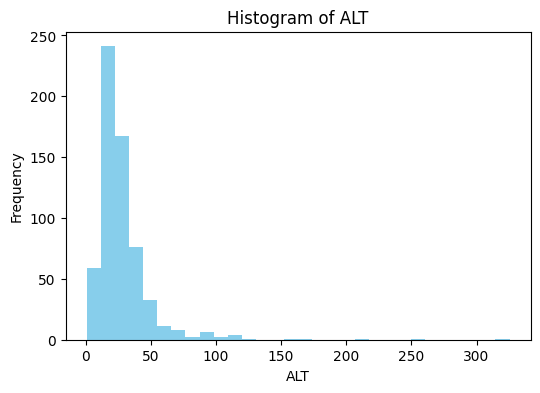

In [225]:
#Histogram of ALT
plt.figure(figsize=(6,4))
plt.hist(df['ALT'], bins=30, color='skyblue')
plt.title('Histogram of ALT')
plt.xlabel('ALT')
plt.ylabel('Frequency')
plt.show()

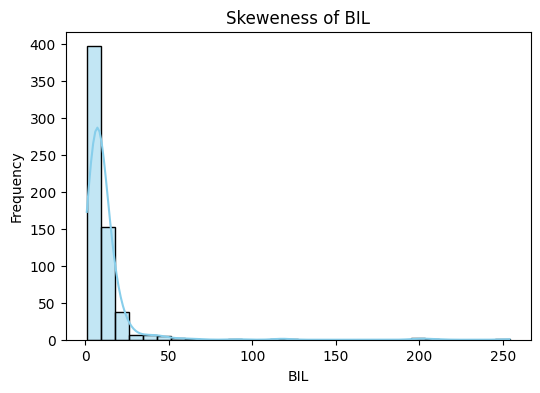

In [226]:
plt.figure(figsize=(6,4))
sns.histplot(df['BIL'], bins=30, color='skyblue', kde = True)
plt.title('Skeweness of BIL')
plt.xlabel('BIL')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-3383446203.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)


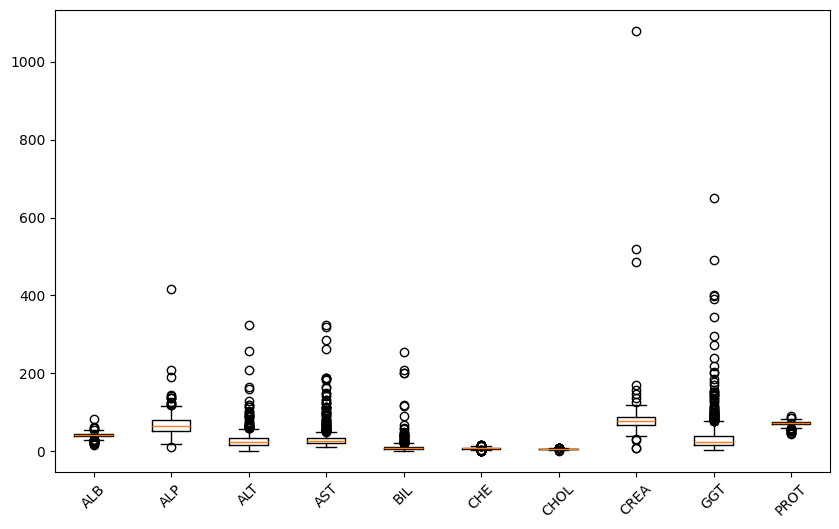

In [227]:
import matplotlib.pyplot as plt

# create a list of the columns to plot
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# create a box plot for each column
plt.figure(figsize=(10,6))
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()

#BIVARIATE

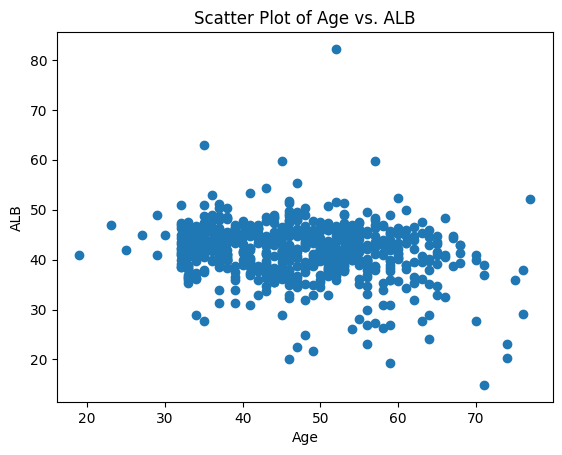

In [228]:
#Bivariate
plt.scatter(df['Age'], df['ALB'])
plt.title('Scatter Plot of Age vs. ALB')
plt.xlabel('Age')
plt.ylabel('ALB')
plt.show()

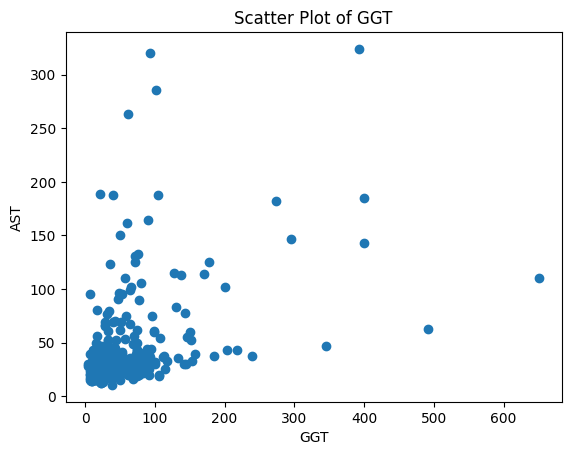

In [229]:
plt.scatter(df['GGT'], df['AST'])
plt.title('Scatter Plot of GGT')
plt.xlabel('GGT')
plt.ylabel('AST')
plt.show()

#MULTIVARIATE

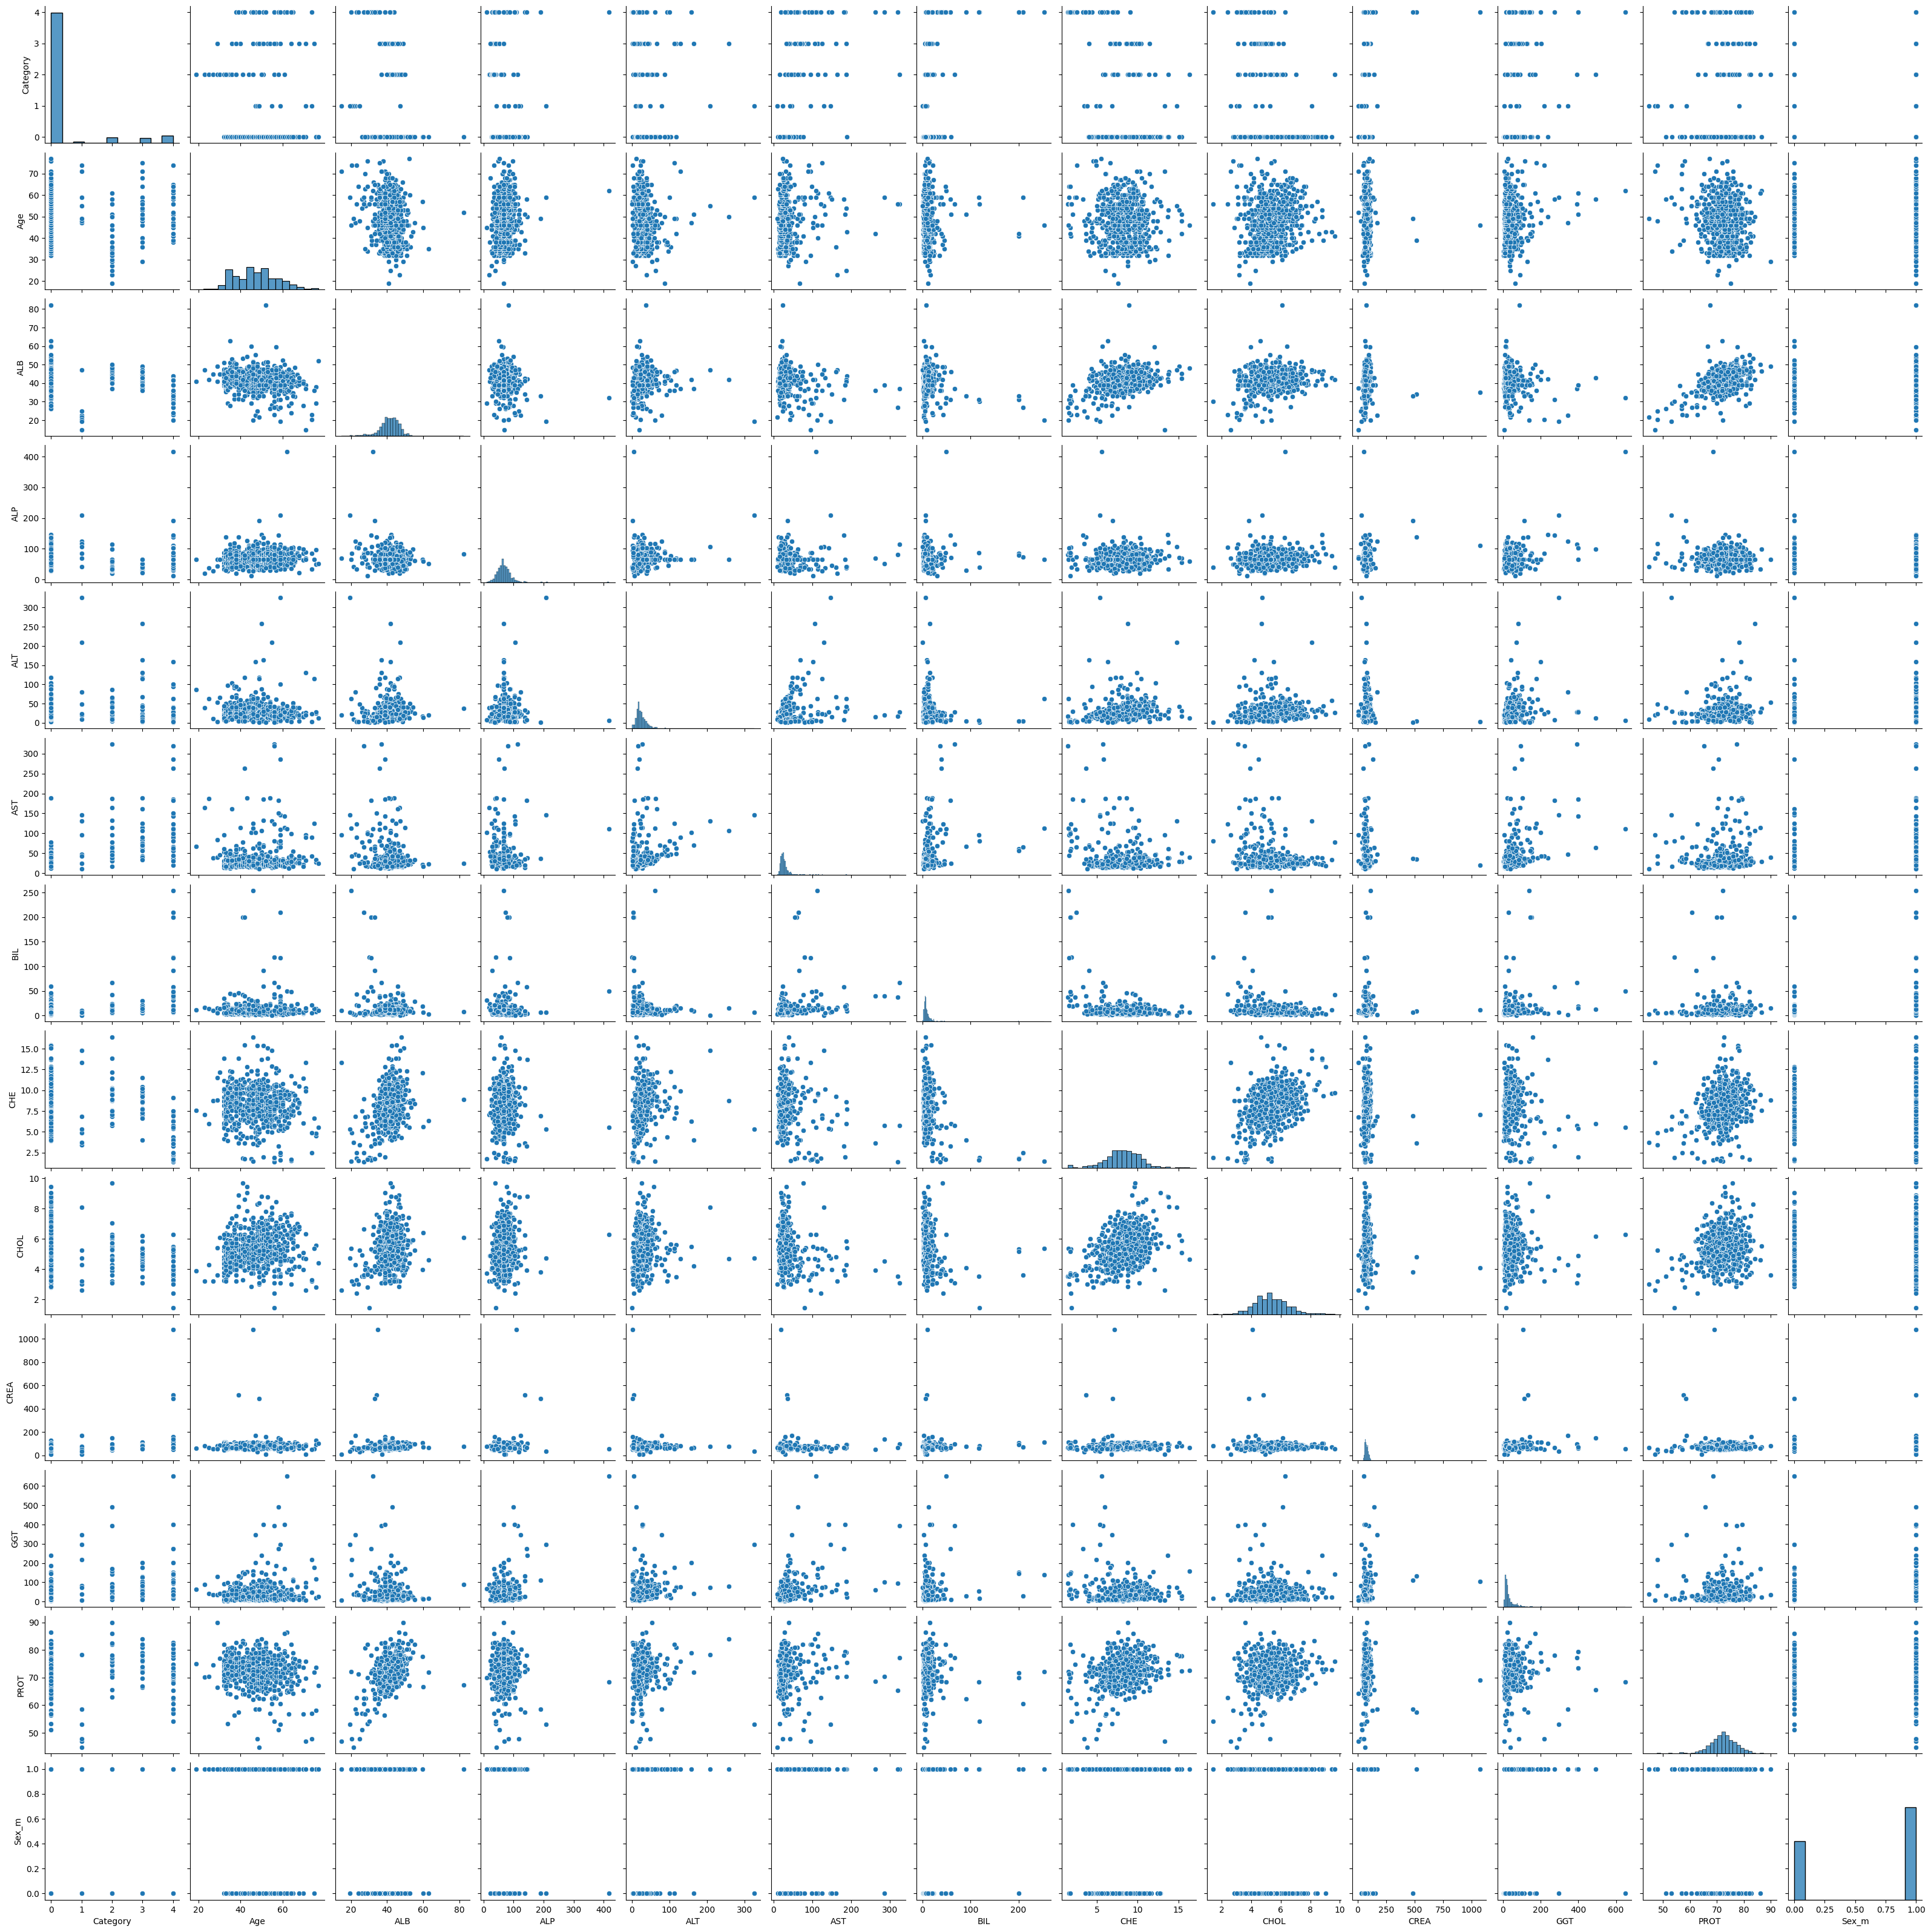

<Figure size 1000x800 with 0 Axes>

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot with customization
sns.pairplot(df)
plt.figure(figsize=(10, 8))
plt.show()

From the above graphs/plots we can see that there are ouliers.
The points away from the clusters are called outliers and these are the ones we have to treat for model preparation.

#Outlier Treating

From the below graph we are calculating the ouliers that are below lower and upper and taking a dictonary and displaying the number of outlier after trating and before treating.

We fill the point if the datapoint have lower than  lower limit or higher than upper limit.

In [231]:
import pandas as pd
import numpy as np

def outlier_summary(df, columns):
    summary = []
    for col in columns:  # Only process the given list of columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        summary.append({
            'Feature': col,
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Std': df[col].std(),
            'Outlier Count': outliers.shape[0],
            'Outlier %': (outliers.shape[0] / df.shape[0]) * 100
        })
    return pd.DataFrame(summary)


def cap_outliers_only_if_present(df, columns):
    df_capped = df.copy()
    summary = outlier_summary(df, columns)

    # Only select columns with >0 outliers
    cols_with_outliers = summary[summary['Outlier Count'] > 0]['Feature'].tolist()

    for col in cols_with_outliers:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])

    return df_capped



selected_columns = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

print("\n=> Outlier Report (Before Curing):")
outlier_report_before = outlier_summary(df, selected_columns)
print(outlier_report_before.sort_values(by='Outlier %', ascending=False))

df_cured = cap_outliers_only_if_present(df, selected_columns)

print("\n=> Outlier Report (After Curing):")
outlier_report_after = outlier_summary(df_cured, selected_columns)
print(outlier_report_after.sort_values(by='Outlier %', ascending=False))



=> Outlier Report (Before Curing):
   Feature       Mean  Median        Std  Outlier Count  Outlier %
9      GGT  39.533171   23.30  54.661071             65  10.569106
4      AST  34.786341   25.90  33.090690             64  10.406504
5      BIL  11.396748    7.30  19.673150             47   7.642276
3      ALT  28.441951   23.00  25.449889             36   5.853659
1      ALB  41.620195   41.90   5.775920             27   4.390244
6      CHE   8.196634    8.26   2.205657             24   3.902439
10    PROT  72.044390   72.20   5.398238             20   3.252033
2      ALP  68.222927   66.20  25.646364             14   2.276423
8     CREA  81.287805   77.00  49.756166             12   1.951220
7     CHOL   5.368099    5.31   1.123466             12   1.951220
0      Age  47.408130   47.00  10.055105              1   0.162602

=> Outlier Report (After Curing):
   Feature       Mean  Median        Std  Outlier Count  Outlier %
0      Age  47.407317   47.00  10.052729              0   

#Checking skweness for outliers

we can see that skewness is between -1 and +1, we can generally say the data is approximately symmetric and fairly close to a normal distribution.

In [232]:
columns = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']
for col in columns:
    skew_value = df_cured[col].skew()
    print(f"{col} skewness: {skew_value}")

    if abs(skew_value) <= 0.5:
        print(f"{col}: Use mean (symmetric distribution)")
    else:
        print(f"{col}: Use median (skewed distribution)")

    print("-" * 40)  # separatorZ

ALB skewness: -0.33451339677454334
ALB: Use mean (symmetric distribution)
----------------------------------------
ALP skewness: 0.3624640007924729
ALP: Use mean (symmetric distribution)
----------------------------------------
ALT skewness: 0.8485830774053356
ALT: Use median (skewed distribution)
----------------------------------------
CHOL skewness: 0.2285086571962774
CHOL: Use mean (symmetric distribution)
----------------------------------------
PROT skewness: -0.18811641718278824
PROT: Use mean (symmetric distribution)
----------------------------------------


In [233]:
df_cured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    float64
 2   ALB       615 non-null    float64
 3   ALP       615 non-null    float64
 4   ALT       615 non-null    float64
 5   AST       615 non-null    float64
 6   BIL       615 non-null    float64
 7   CHE       615 non-null    float64
 8   CHOL      615 non-null    float64
 9   CREA      615 non-null    float64
 10  GGT       615 non-null    float64
 11  PROT      615 non-null    float64
 12  Sex_m     615 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 62.6 KB


From the below graphs we can say that the most of the grpahs has normal distribution and the ouliers has also descreased.

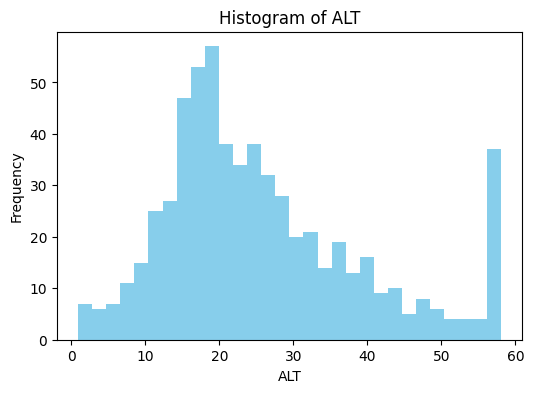

In [234]:
#Histogram of ALT
plt.figure(figsize=(6,4))
plt.hist(df_cured['ALT'], bins=30, color='skyblue')
plt.title('Histogram of ALT')
plt.xlabel('ALT')
plt.ylabel('Frequency')
plt.show()

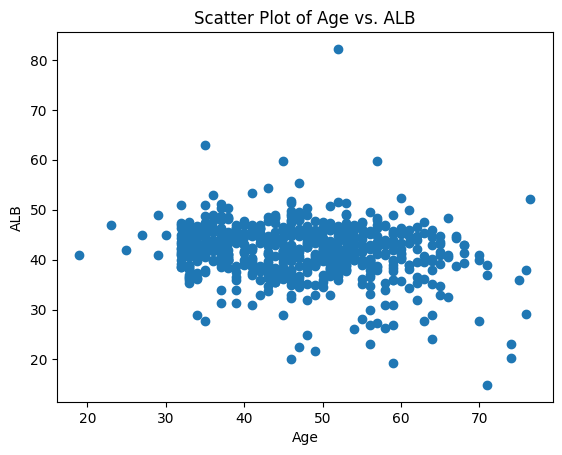

In [235]:
plt.scatter(df_cured['Age'], df['ALB'])
plt.title('Scatter Plot of Age vs. ALB')
plt.xlabel('Age')
plt.ylabel('ALB')
plt.show()

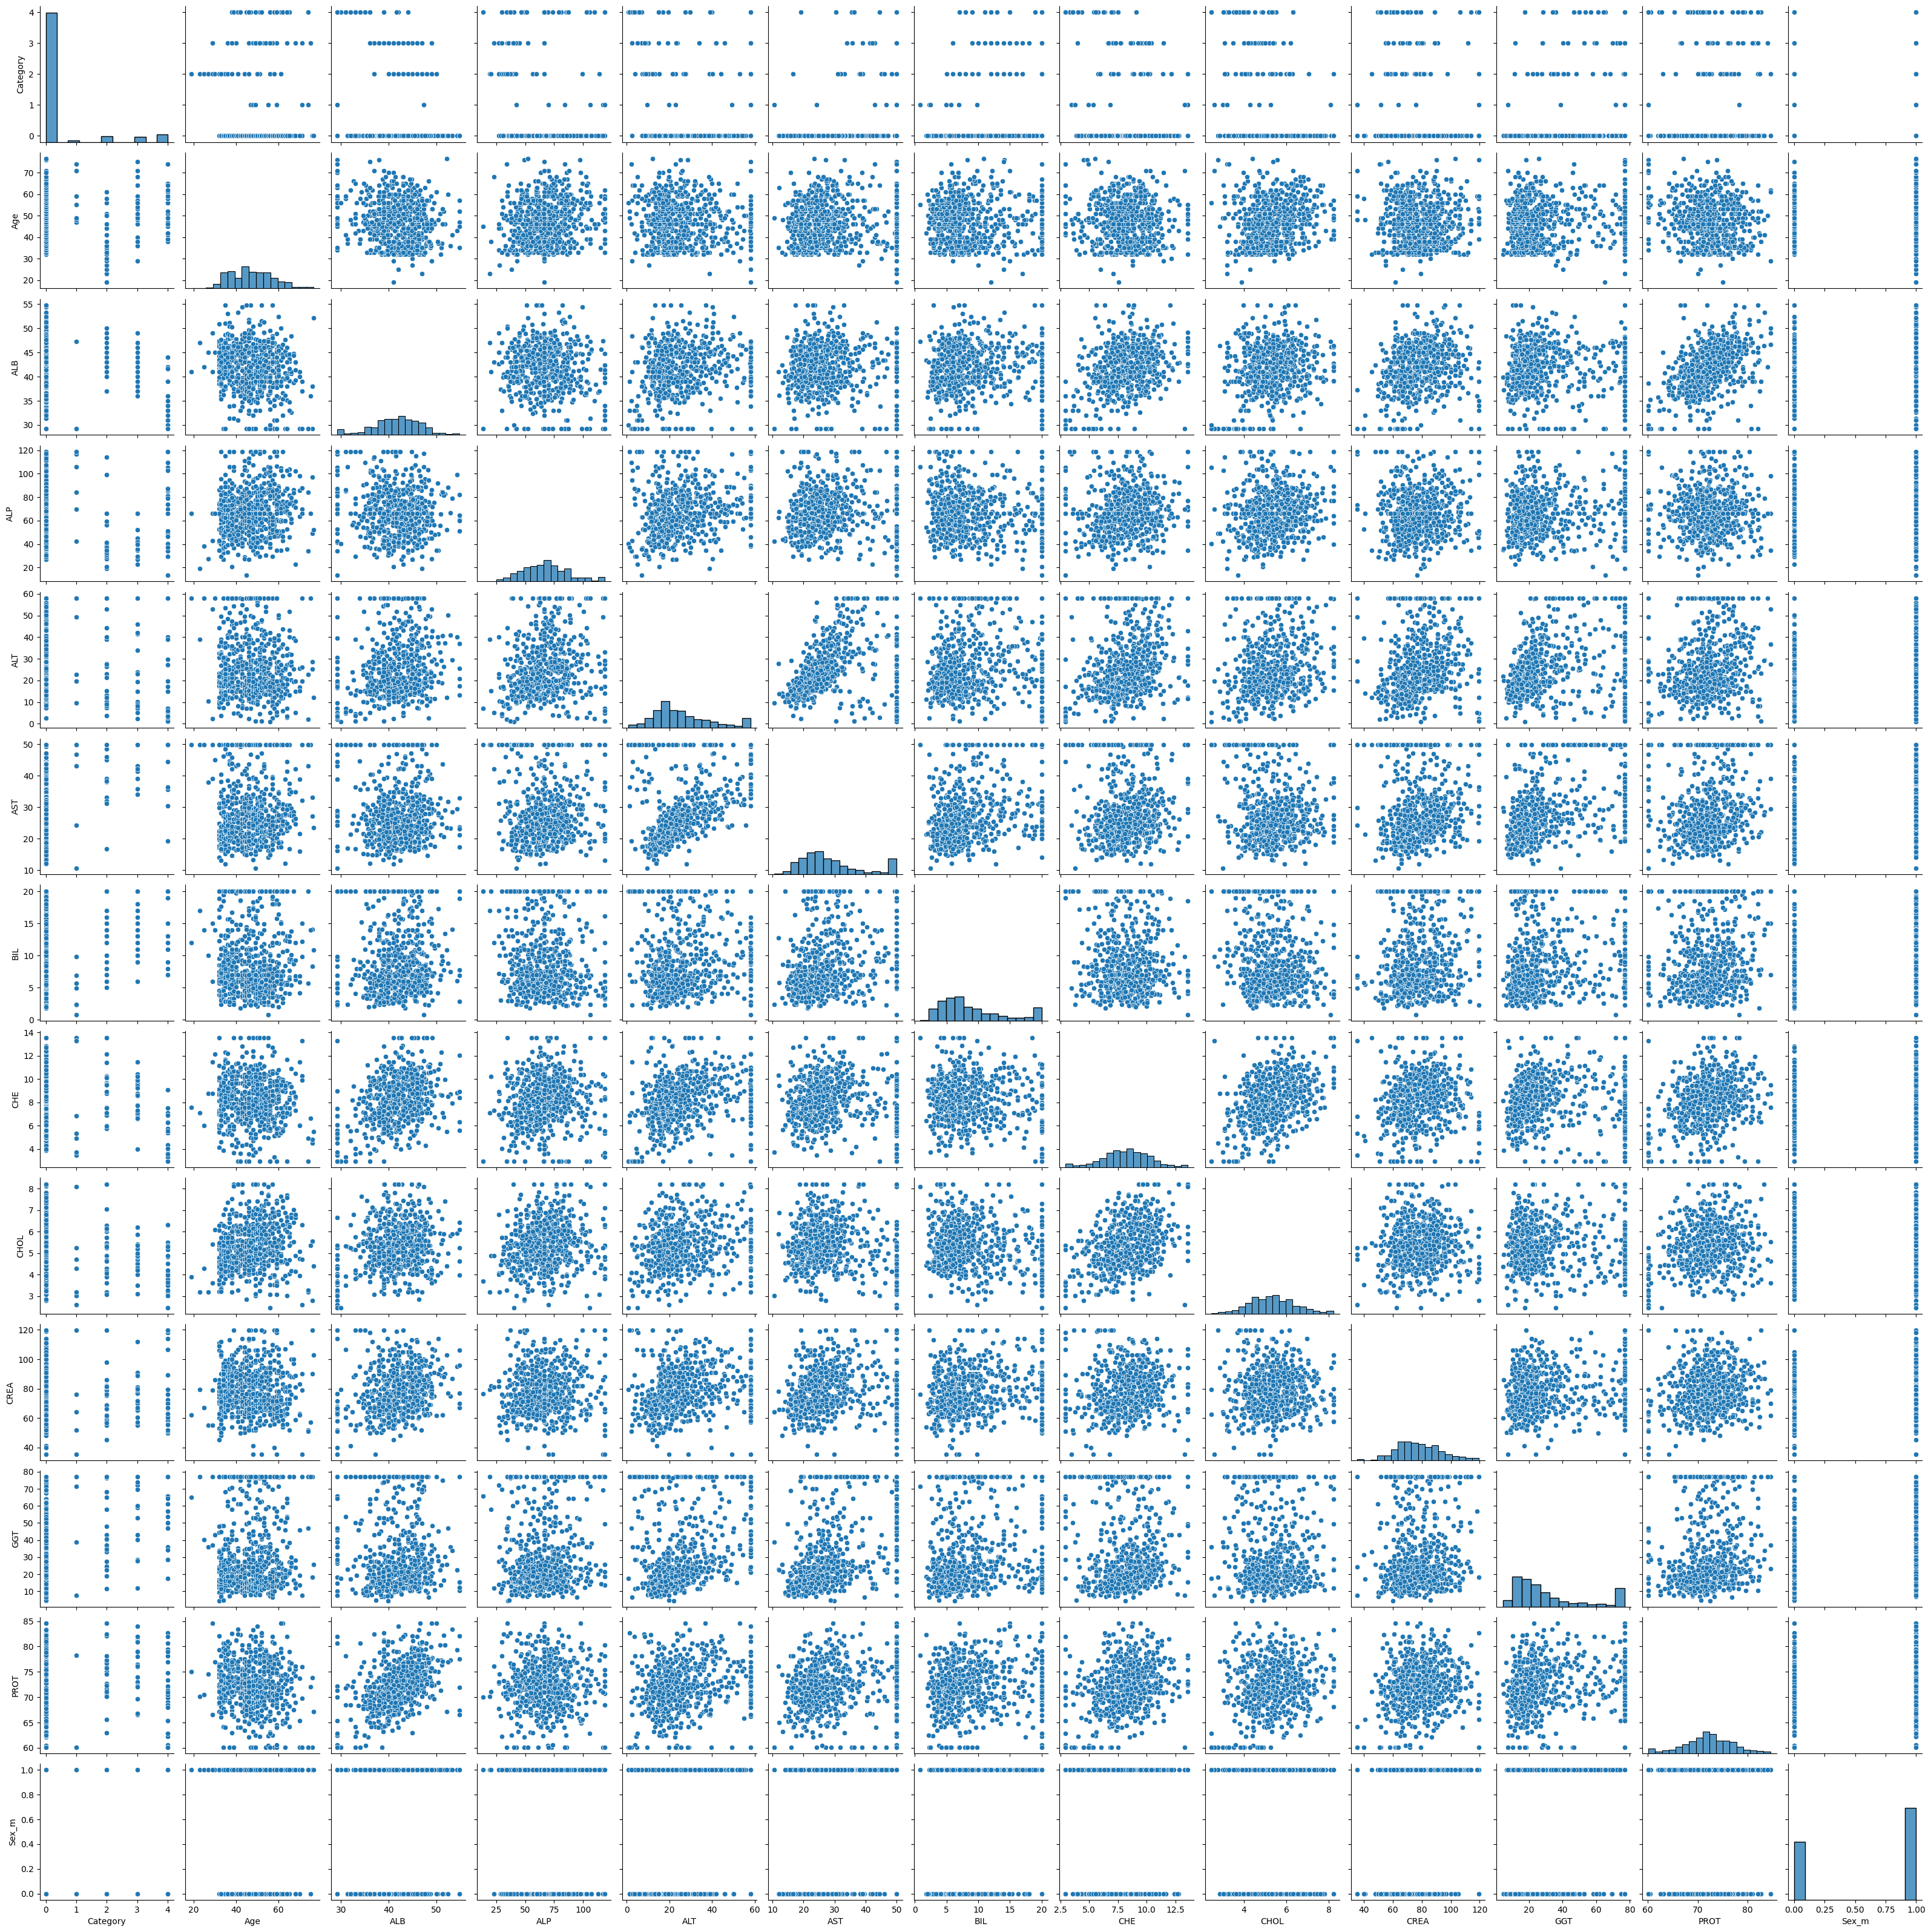

<Figure size 1000x800 with 0 Axes>

In [236]:
sns.pairplot(df_cured)
plt.figure(figsize=(10, 8))
plt.show()

#correleation of cured data

From the corelation we can see that the every two featurs does not have a corelation more that 0.95 which is good and we dont have to drop any column.

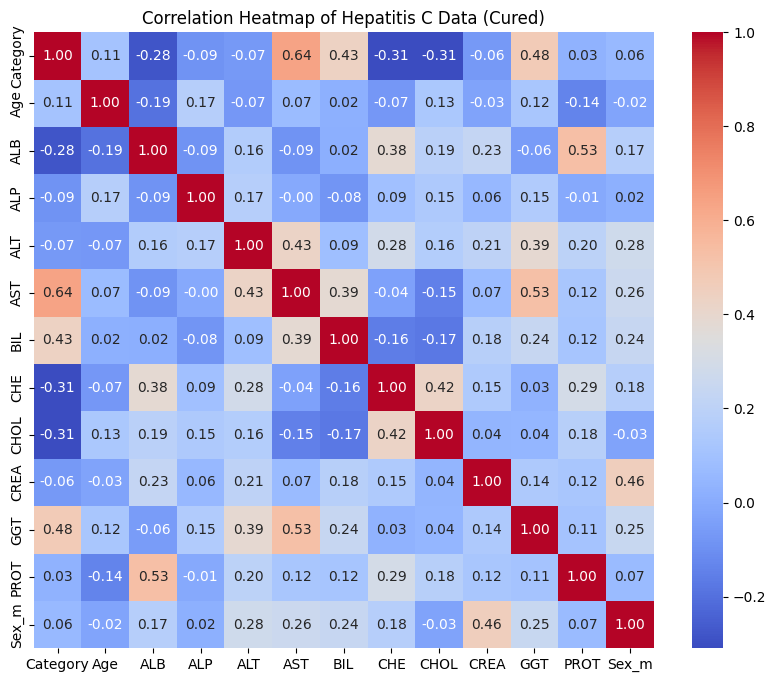

In [237]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cured.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Hepatitis C Data (Cured)')
plt.show()

From the above corelation map, we can see that there is no corelation above 0.95 then we leave all the columns as it is.

#BoxPlot

From the box plot we can say that the data doesnot have any outlier.

/tmp/ipython-input-1383458894.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_cured[columns_to_plot].values, labels=columns_to_plot, showfliers=True)


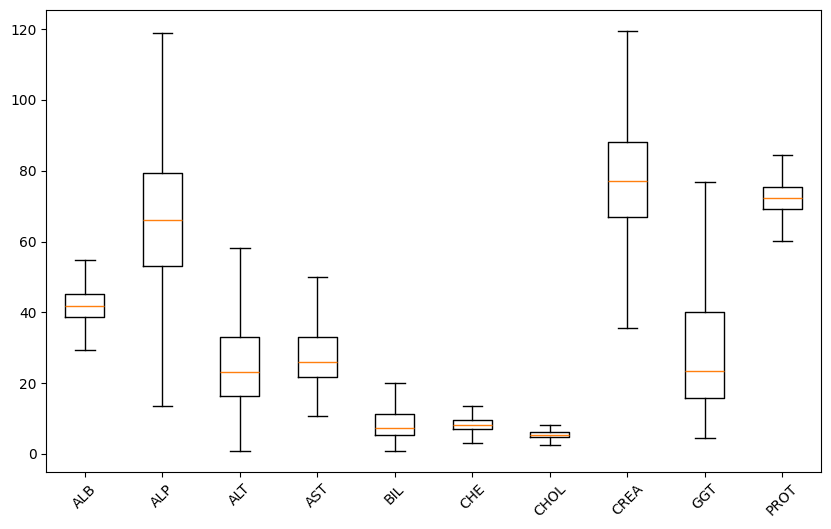

In [238]:
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# create a box plot for each column
plt.figure(figsize=(10,6))
plt.boxplot(df_cured[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()

#Mean Median

Checking if mean and median are equal if they are equal then the data is said to be Normally distributed.




In [239]:
cured_mean = df_cured.mean()
cured_median = df_cured.median()
print("Mean of Cured Data:")
print(cured_mean)
print("\nMedian of Cured Data:")
print(cured_median)

Mean of Cured Data:
Category     0.386992
Age         47.407317
ALB         41.702472
ALP         67.283984
ALT         25.860163
AST         28.668130
BIL          8.879431
CHE          8.202309
CHOL         5.359774
CREA        78.356748
GGT         31.590163
PROT        72.203577
Sex_m        0.613008
dtype: float64

Median of Cured Data:
Category     0.00
Age         47.00
ALB         41.90
ALP         66.20
ALT         23.00
AST         25.90
BIL          7.30
CHE          8.26
CHOL         5.31
CREA        77.00
GGT         23.30
PROT        72.20
Sex_m        1.00
dtype: float64


As we can see the mean and median are somewhat equal so we can say that the data is normally distributed.

Checking if the dataset has any Zero variance or not.
if it have zero variance we have to drop the column.
if it does not have zero variance column we can procede to model building.

In [240]:
df_cured.var()  == 0

Category    False
Age         False
ALB         False
ALP         False
ALT         False
AST         False
BIL         False
CHE         False
CHOL        False
CREA        False
GGT         False
PROT        False
Sex_m       False
dtype: bool

This is the total Filtered dataet by using EDA.

In [241]:
df_cured

Category   Age   ALB      ALP     ALT    AST    BIL      CHE  CHOL  \
0           0  32.0  38.5   52.500   7.700  22.10   7.50   6.9300  3.23   
1           0  32.0  38.5   70.300  18.000  24.70   3.90  11.1700  4.80   
2           0  32.0  46.9   74.700  36.200  49.85   6.10   8.8400  5.20   
3           0  32.0  43.2   52.000  30.600  22.60  18.90   7.3300  4.74   
4           0  32.0  39.2   74.100  32.600  24.80   9.60   9.1500  4.32   
..        ...   ...   ...      ...     ...    ...    ...      ...   ...   
610         4  62.0  32.0  118.825   5.900  49.85  20.05   5.5700  6.30   
611         4  64.0  29.2  102.800   2.900  44.40  20.00   2.9525  3.02   
612         4  64.0  29.2   87.300   3.500  49.85  20.05   2.9525  3.63   
613         4  46.0  33.0   66.200  39.000  49.85  20.00   3.5600  4.20   
614         4  59.0  36.0   66.200  58.025  49.85  12.00   9.0700  5.30   

      CREA    GGT  PROT  Sex_m  
0    106.0  12.10  69.0    1.0  
1     74.0  15.60  76.5    1.0  
2     86.0  33.20  79.3    1.0  
3     80.0  33.80  75.7    1.0  
4     76.0  29.90  68.7    1.0  
..     ...    ...   ...    ...  
610   55.7  76.95  68.5    0.0  
611   63.0  35.90  71.3    0.0  
612   66.7  64.20  82.0    0.0  
613   52.0  50.00  71.0    0.0  
614   67.0  34.00  68.0    0.0  

[615 rows x 13 columns]